In [ ]:
!nvidia-smi

Sun Mar 23 09:13:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

# Sentiment Analysis

In [ ]:
from transformers import pipeline

classifier = pipeline(task="sentiment-analysis", model="facebook/bart-large-mnli")
result = classifier("I am very happy")
print(result)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'neutral', 'score': 0.8462987542152405}]


In [ ]:
from transformers import pipeline

classifier = pipeline(task="sentiment-analysis", model = "SamLowe/roberta-base-go_emotions")
task_list = ["I really like Autoencoders, best models for Anomaly Detection", \
            "I am not sure if we CAN actually Evaluate LLMs.", \
            "PassiveAgressive is the name of a Linear Regression Model that so many people do not know.",\
            "I hate long Meetings."]
result = classifier(task_list)
print(result)

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'admiration', 'score': 0.7406536340713501}, {'label': 'confusion', 'score': 0.9066852331161499}, {'label': 'neutral', 'score': 0.7837758660316467}, {'label': 'anger', 'score': 0.7870621085166931}]


In [ ]:
from transformers import pipeline

classifier = pipeline(task="text-generation", model = "distilbert/distilgpt2", device="cuda")
text = "Today is a rainy day in London"
result = classifier(text, truncation=True,
                                num_return_sequences = 2) # Truncation=true means when the text you give exceeds the word limit or token limit of model, it truncates the rest and take it to maximum
                                # num_return_sequences = 2 -- Two outputs
print(result)

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Today is a rainy day in London: people are moving in, people are moving into cars, people are working the streets with all their money and people are putting on a bus. There are only about 18 people out there, in the UK the numbers'}, {'generated_text': "Today is a rainy day in London. We've been in work in New York for more than eight hours. It's also cold and it's rainy. I'm feeling so miserable, at the end of the day, that I could use a car"}]


In [16]:
from transformers import pipeline

qa_model = pipeline("question-answering", model="Intel/dynamic_tinybert")
question = "What is the place that name start with T and present in Andhra Pradesh ?"
context = "There are 26 states in India in which Andhra Pradesh, TamilNadu, Telangana are important. Tirupati and Nellore belongs to Andhra Pradesh while Chennai is in Tamil Nadu"
qa_model(question = question, context = context) #Context is a text from where model has to see the data and get it extraxted

Invalid model-index. Not loading eval results into CardData.
Device set to use cpu


{'score': 0.16324631869792938, 'start': 54, 'end': 63, 'answer': 'TamilNadu'}

AutoTokenizer → Automatically loads the right tokenizer for a given model.

AutoModelForSequenceClassification → Loads a transformer model specifically for text classification tasks (e.g., sentiment analysis).

DistilBertTokenizer → A tokenizer for DistilBERT, a lightweight version of BERT.

DistilBertForSequenceClassification → A DistilBERT model pre-trained for text classification (e.g., spam detection, sentiment analysis).

🔹 Auto Classes (AutoTokenizer, AutoModelForSequenceClassification) are generic and work with any transformer model.
🔹 DistilBERT Classes (DistilBertTokenizer, DistilBertForSequenceClassification) are specific to DistilBERT.

In [19]:
from transformers import AutoTokenizer, \
AutoModelForSequenceClassification, \
DistilBertTokenizer, DistilBertForSequenceClassification

model_name2 = "nlptown/bert-base-multilingual-uncased-sentiment"
mymodel2 = AutoModelForSequenceClassification.from_pretrained(model_name2)
mytokenizer2 = AutoTokenizer.from_pretrained(model_name2)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [23]:
classifier = pipeline("sentiment-analysis", model = mymodel2 , tokenizer = mytokenizer2)
res = classifier("I hate barbie movie")
res

Device set to use cpu


[{'label': '1 star', 'score': 0.3634227514266968}]

In [24]:
tokens = mytokenizer2.tokenize("I hate barbie movie")
tokens

['i', 'hate', 'bar', '##bie', 'movie']

In [1]:
!nvidia-smi

Sun Mar 23 11:21:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
from transformers import AutoTokenizer

# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Example text
text = "I was so not happy with the Barbie Movie"

# Tokenize the text
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)

# Convert tokens to input IDs
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Input IDs:", input_ids)

# Encode the text (tokenization + converting to input IDs)
encoded_input = tokenizer(text)
print("Encoded Input:", encoded_input)

# Decode the text
decoded_output = tokenizer.decode(input_ids)
print("Decode Output: ", decoded_output)

Tokens: ['i', 'was', 'so', 'not', 'happy', 'with', 'the', 'barbie', 'movie']
Input IDs: [1045, 2001, 2061, 2025, 3407, 2007, 1996, 22635, 3185]
Encoded Input: {'input_ids': [101, 1045, 2001, 2061, 2025, 3407, 2007, 1996, 22635, 3185, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Decode Output:  i was so not happy with the barbie movie


token_type_ids
These IDs are used to distinguish between different sequences in tasks that involve multiple sentences, such as question-answering and sentence-pair classification. BERT uses this mechanism to understand which tokens belong to which segment. For single-sequence tasks like sentiment analysis, token_type_ids are all zeros.

attention_mask
The attention mask is used to differentiate between actual tokens and padding tokens (if any). It helps the model focus on non-padding tokens and ignore padding tokens. A value of 1 indicates that the token should be attended to, while a value of 0 indicates padding.

Why Padding Tokens Are Used
Uniform Sequence Length: Deep learning models typically process input data in batches. To efficiently process these batches, all sequences in a batch must have the same length. Padding tokens ensure this by extending shorter sequences to match the length of the longest sequence in the batch. Efficient Computation: Fixed-length sequences allow for more efficient use of hardware resources, as the model can process all sequences in parallel without needing to handle variable-length sequences individually.

# Fine Tunning IMDB

In [7]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [8]:
from datasets import load_dataset
dataset = load_dataset('imdb')

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [10]:
from transformers import AutoTokenizer
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)
tokenized_datasets = dataset.map(tokenize_function, batched=True)
# map function applies the function "tokenize_function" to all the rows of datasets and batched=True makes Instead of processing one text at a time, it processes multiple texts in parallel.

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

📌 Logging helps track training progress. \
📌 Checkpoints save the model automatically so we don’t lose progress. \
📌 Batch size determines how many examples are processed at once. \
📌 Epochs control how many times the model sees the full dataset.

📌 evaluation_strategy decides when to evaluate the model on the validation set.\
📌 "no" → No evaluation during training.\
📌 "epoch" → Evaluates after each epoch (recommended for most cases).\
📌 "steps" → Evaluates every eval_steps steps (useful for large datasets). You need to again provide eval_steps (Example eval_steps = 500)

In [12]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    eval_strategy ="epoch",     # Evaluate every epoch
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=1,              # Number of training epochs
    weight_decay=0.01,               # Strength of weight decay
)

📌 AutoModelForSequenceClassification → Loads a pretrained model for classification tasks.\
📌 Trainer → A high-level API to train, evaluate, and save models easily.

📌 num_labels sets the number of output classes the model predicts.\
📌 Binary classification → num_labels=2\
📌 Multi-class classification → num_labels > 2\
📌 Multi-label classification → problem_type="multi_label_classification"

In [13]:
from transformers import AutoModelForSequenceClassification, Trainer

In [14]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test']
)

📌 Training Loss → Measures how well the model fits the training data.\
📌 Validation Loss → Measures how well the model generalizes to unseen data.\
📌 Validation loss should ideally decrease. If it increases, the model is overfitting!

In [17]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
# Evaluate the model
results = trainer.evaluate()
print(results)



# Save the model
model.save_pretrained('./fine-tuned-model')
tokenizer.save_pretrained('./fine-tuned-tokenizer')

# ArXiv Project

In [18]:
!pip install arxiv

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.0 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=c2b383501f102455ea54959849f0973e36b0162fec4a8e535f7b143aa3997ae2
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [21]:
import arxiv
import pandas as pd

query = 'atmospheric science'
search = arxiv.Search(query=query, max_results=10, sort_by=arxiv.SortCriterion.SubmittedDate)

# Fetch papers
papers = []
for result in search.results():
    papers.append({
      'published': result.published,
        'title': result.title,
        'abstract': result.summary,
        'categories': result.categories
    })

# Convert to DataFrame
df = pd.DataFrame(papers)

pd.set_option('display.max_colwidth', None)

<ipython-input-21-265a3bf36cb8>:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


,published,title,abstract,categories
0,2025-03-20 17:59:21+00:00,Computing Lindahl Equilibrium for Public Goods with and without Funding Caps,"Lindahl equilibrium is a solution concept for allocating a fixed budget\nacross several divisible public goods. It always lies in the core, meaning that\nthe equilibrium allocation satisfies desirable stability and proportional\nfairness properties. We consider a model where agents have separable linear\nutility functions over the public goods, and the output assigns to each good an\namount of spending, summing to at most the available budget.\n In the uncapped setting, each of the public goods can absorb any amount of\nfunding. In this case, it is known that Lindahl equilibrium is equivalent to\nmaximizing Nash social welfare, and this allocation can be computed by a\npublic-goods variant of the proportional response dynamics. We introduce a new\nconvex programming formulation for computing this solution and show that it is\nrelated to Nash welfare maximization through duality and reformulation. We then\nshow that the proportional response dynamics is equivalent to running mirror\ndescent on our new formulation, thereby providing a new and immediate proof of\nthe convergence guarantee for the dynamics. Our new formulation has\nsimilarities to Shmyrev's convex program for Fisher market equilibrium.\n In the capped setting, each public good has an upper bound on the amount of\nfunding it can receive. In this setting, existence of Lindahl equilibrium was\nonly known via fixed-point arguments. The existence of an efficient algorithm\ncomputing one has been a long-standing open question. We prove that our new\nconvex program continues to work when the cap constraints are added, and its\noptimal solutions are Lindahl equilibria. Thus, we establish that Lindahl\nequilibrium can be efficiently computed in the capped setting. Our result also\nimplies that approximately core-stable allocations can be efficiently computed\nfor the class of separable piecewise-linear concave (SPLC) utilities.",[cs.GT]
1,2025-03-20 17:58:12+00:00,Deep Feynman-Kac Methods for High-dimensional Semilinear Parabolic Equations: Revisit,"Deep Feynman-Kac method was first introduced to solve parabolic partial\ndifferential equations(PDE) by Beck et al. (SISC, V.43, 2021), named Deep\nSplitting method since they trained the Neural Networks step by step in the\ntime direction. In this paper, we propose a new training approach with two\ndifferent features. Firstly, neural networks are trained at all time steps\nglobally, instead of step by step. Secondly, the training data are generated in\na new way, in which the method is consistent with a direct Monte Carlo scheme\nwhen dealing with a linear parabolic PDE. Numerical examples show that our\nmethod has significant improvement both in efficiency and accuracy.",[cs.CE]
2,2025-03-20 17:43:56+00:00,Non-Markovian Relaxation Spectroscopy of Fluxonium Qubits,"Recent studies have shown that parasitic two-level systems (TLS) in\nsuperconducting qubits, which are a leading source of decoherence, can have\nrelaxation times longer than the qubits themselves. However, the standard\ntechniques used to characterize qubit relaxation is only valid for measuring\n$T_1$ under Markovian assumptions and could mask such non-Markovian behavior of\nthe environment in practice. Here, we introduce two-timescale relaxometry, a\ntechnique to probe the qubit and environment relaxation simultaneously and\nefficiently. We apply it to high-coherence fluxonium qubits over a frequency\nrange of 0.1-0.4 GHz, which reveals a discrete spectrum of TLS with millisecond\nlifetimes. Our analysis of the spectrum is consistent with a random\ndistribution of TLS in the aluminum oxide tunnel barrier of the Josephson\njunction chain of the fluxonium with an average density and electric dipole\nsimilar to previous TLS studies at much higher frequencies. Our study suggests\nthat investigating and mitigating TLS in the ju

In [23]:
# Example abstract from API
from transformers import pipeline
abstract = df['abstract'][0]

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Summarization
summarization_result = summarizer(abstract)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


# Text to Speech

In [24]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [29]:
text = "My name is Praneeth and I am an Indian"

pipe = pipeline("text-to-speech", model="suno/bark-small", device="cuda")

output = pipe(text)
output

Device set to use cuda
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


{'audio': array([[ 1.8149085e-04, -3.2338721e-04,  6.5090688e-05, ...,
          1.6885155e-03,  8.9235501e-03,  1.6120143e-02]], dtype=float32),
 'sampling_rate': 24000}

In [31]:
from IPython.display import Audio

Audio(output["audio"], rate=output["sampling_rate"])

# Text to Image using Diffusion Models

In [32]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [33]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [34]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [35]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [61]:
prompt = """indian 18 years woman with black hair, wearing rectangular glasses which are frameless, straight hair looking modern
"""

  0%|          | 0/50 [00:00<?, ?it/s]

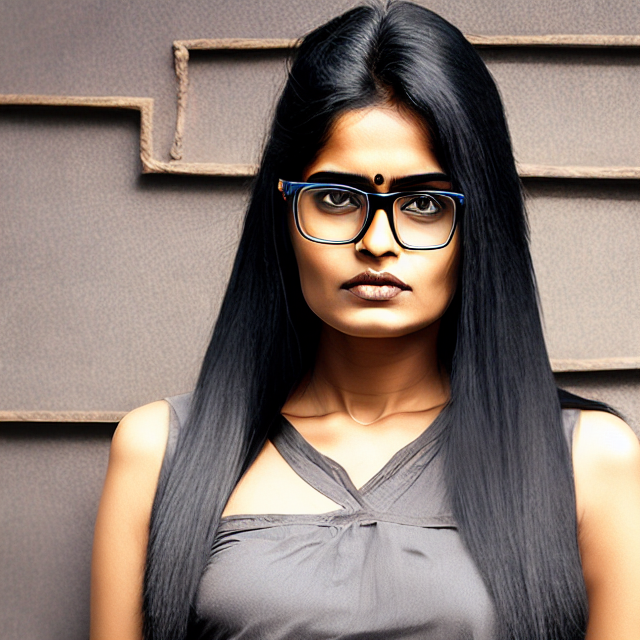

In [62]:
image = pipe(prompt).images[0]
image

In [63]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()
  ## **params means passing parameters as a dictionary

  0%|          | 0/50 [00:00<?, ?it/s]

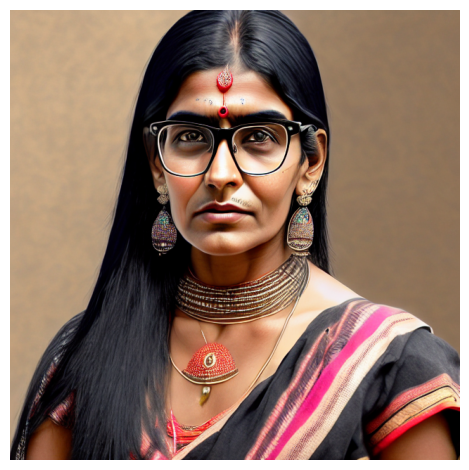

In [74]:
prompt = "indian 18-years woman with black hair, wearing rectangular glasses which are frameless, straight hair looking traditional"

params = {}
generate_image(pipe, prompt, params)


  0%|          | 0/100 [00:00<?, ?it/s]

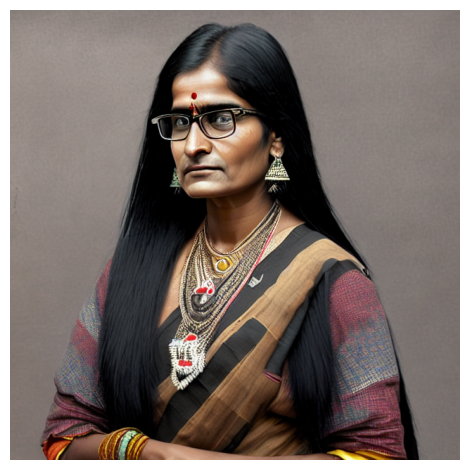

In [76]:
#num inference steps - controls how many denoising steps the model takes to generate an image. Heigher the number, more time it takes but generate detailed image, lesser the number it takes less time but generate less detailed image
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

📌 negative_prompt helps fine-tune AI-generated images by avoiding unwanted elements. \
📌 Useful for removing blurriness, bad quality, extra objects, or specific styles.

  0%|          | 0/100 [00:00<?, ?it/s]

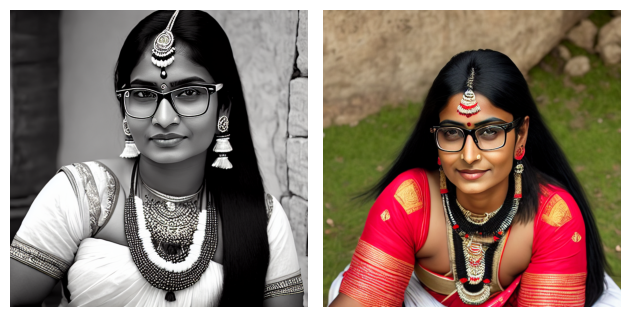

In [75]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality, face unclear and looking distorted, slim, face is blurred'}

generate_image(pipe, prompt, params)